In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
# Create 5 blobs of 2,000 random data
n_samples = 2000
random_state = 42
X, y = make_blobs(n_samples=n_samples, 
                  random_state=random_state, 
                  centers=5)

Text(0.5, 1.0, 'No Clusters Assigned')

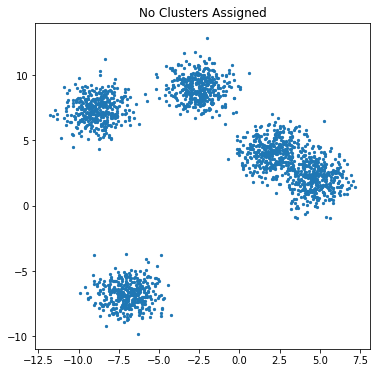

In [3]:
# Plot the random blub data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.title(f"No Clusters Assigned")

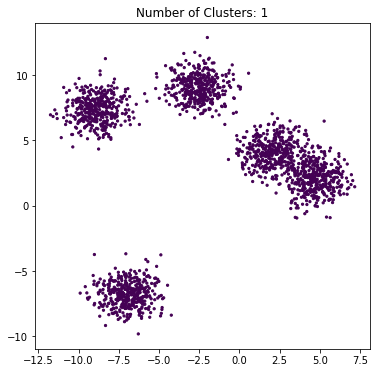

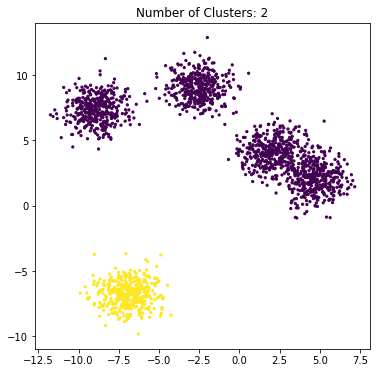

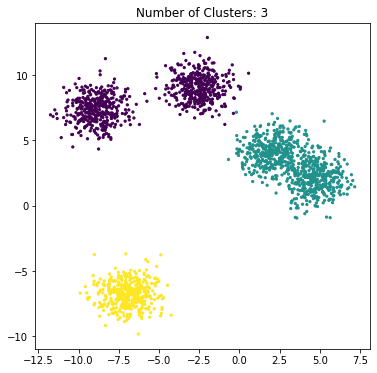

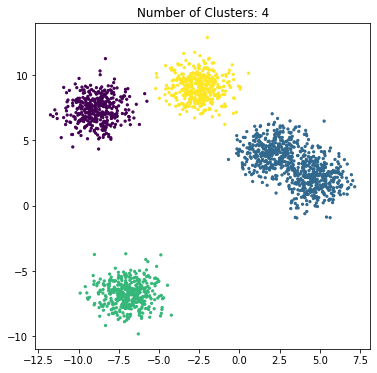

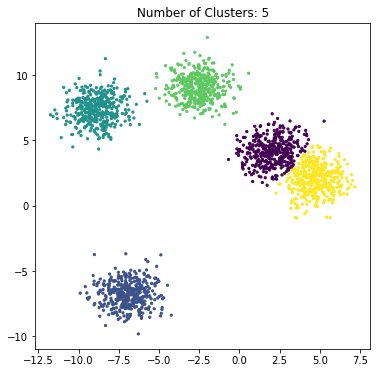

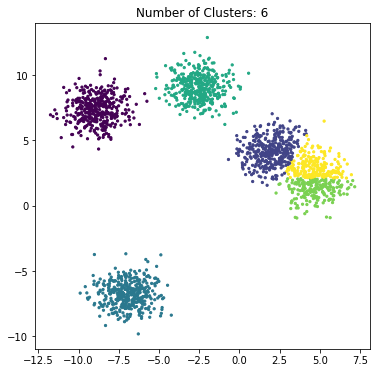

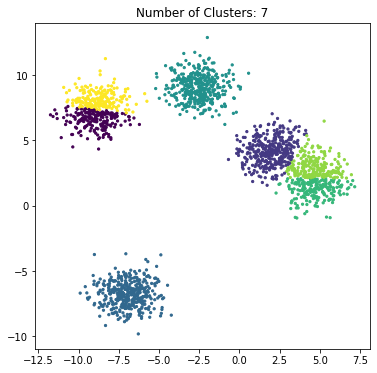

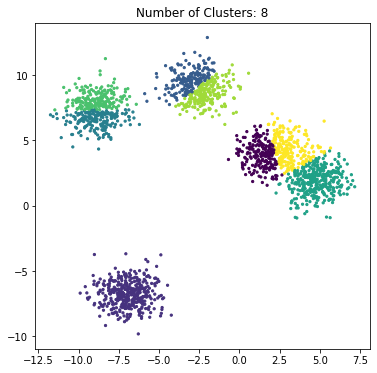

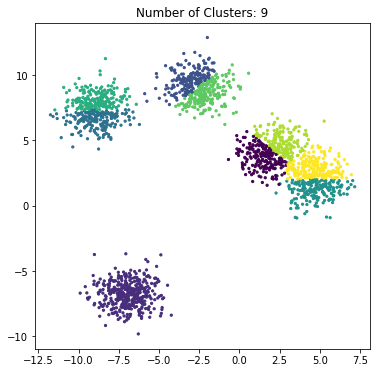

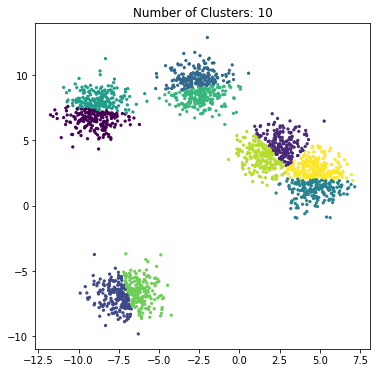

In [4]:
# Plot the data and color code based on clusters
# changing the number of clusters 
for i in range(1,11):
    plt.figure(figsize=(6, 6))
    
    # Predicting the clusters
    y_pred = KMeans(n_clusters=i, random_state=random_state).fit_predict(X)
# plotting the clusters
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=5)
    plt.title(f"Number of Clusters: {i}")
plt.show();

In [5]:
km = KMeans(n_clusters=i, random_state=random_state)
km.fit(X)
km.inertia_

2500.6665235945666

In [7]:
from sklearn.metrics import silhouette_score

In [8]:
# Calculating the inertia and silhouette_score¶
inertia = []
sil = []
# changing the number of clusters 
for k in range(2,11):
    
    km = KMeans(n_clusters=k, random_state=random_state)
    km.fit(X)
    y_pred = km.predict(X)
    
    inertia.append((k, km.inertia_))
    sil.append((k, silhouette_score(X, y_pred)))

Text(0.5, 1.0, 'Silhouetter Score Curve')

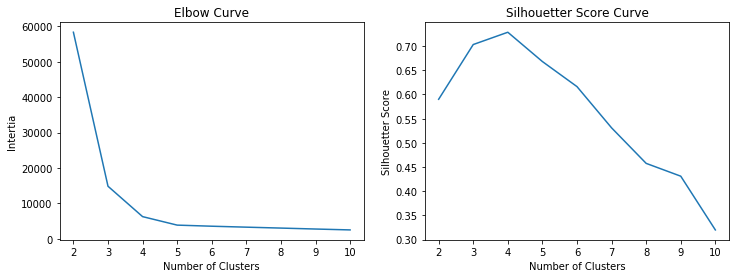

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
# Plotting Elbow Curve
x_iner = [x[0] for x in inertia]
y_iner  = [x[1] for x in inertia]
ax[0].plot(x_iner, y_iner)
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Intertia')
ax[0].set_title('Elbow Curve')
# Plotting Silhouetter Score
x_sil = [x[0] for x in sil]
y_sil  = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil)
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')


You can see that the inertia score always drops when you increase the number of clusters. However, the elbow curve can tell you above 4 clusters, the change in the inertia was not significant. Now, let’s look at the silhouette curve. You can see that the maximum score happens at 4 clusters (the higher the silhouette score, the better the clustering).
Coupling the elbow curve with the silhouette score curve provides invaluable insight into the performance of K-Means.